# EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('app_data_eda.csv')
df.sample()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3
183904,313175,0,Cash loans,F,N,N,0,90000.0,227520.0,18103.5,...,0,0,0,Business Entity Type 2,3,3,3,3,1,1


# 1. Client Profile Analysis

In [3]:
df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,202500.0,406597.5,24700.5
1,270000.0,1293502.5,35698.5
2,67500.0,135000.0,6750.0
3,135000.0,312682.5,29686.5
4,121500.0,513000.0,21865.5
...,...,...,...
307485,157500.0,254700.0,27558.0
307486,72000.0,269550.0,12001.5
307487,153000.0,677664.0,29979.0
307488,171000.0,370107.0,20205.0


In [4]:
df[df['OCCUPATION_TYPE']=='Pensioner'][['OCCUPATION_TYPE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].head(5)

,OCCUPATION_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
8,Pensioner,112500.000,1019610.0,33826.5
11,Pensioner,38419.155,148365.0,10678.5
23,Pensioner,83250.000,239850.0,23850.0
28,Pensioner,270000.000,790830.0,57676.5
30,Pensioner,292500.000,665892.0,24592.5


### 1.1 Calculating the Debt to Income Ratio (DTI)

In [5]:
df['DTI'] = round((df['AMT_ANNUITY']/df['AMT_INCOME_TOTAL'])*100)

In [6]:
df[['OCCUPATION_TYPE','DTI']].head()

,OCCUPATION_TYPE,DTI
0,Laborers,12.0
1,Core staff,13.0
2,Laborers,10.0
3,Laborers,22.0
4,Core staff,18.0


In [7]:
above_35 = (df[df['DTI']>35]['DTI'].count()/len(df))*100
below_35 = (df[df['DTI']<35]['DTI'].count()/len(df))*100

print(f'Percentage of people with payment difficulties : {above_35}')
print(f'Percentage of people without payment difficulties : {below_35}')

Percentage of people with payment difficulties : 4.700965885069433
Percentage of people without payment difficulties : 94.6209632833588


* The debt to income ratio (DTI) ranges between 12% to 130%. Usuallu a DTI ratio of 35% or less is considered good. 
* The dataset has around 94% of the customers have a good DTI ratio
* But 4.7% of the people have DTI more than 35%(14455 customers) and these people may be considered as people with payment difficulties.

### 1.2 Checking the occupation of the people with payment difficulties

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

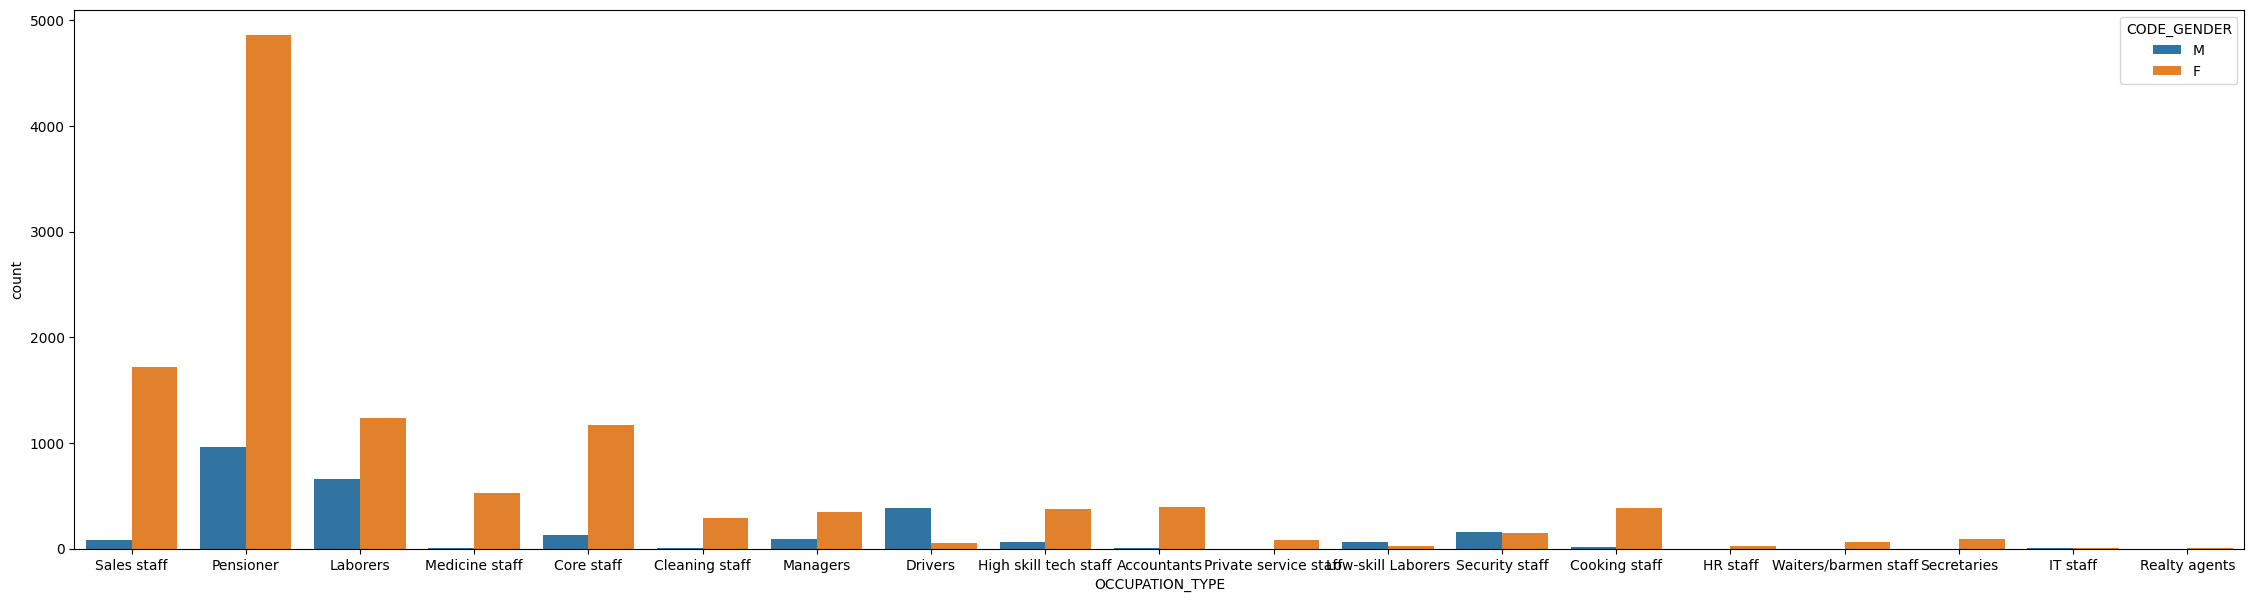

In [9]:
plt.figure(figsize=(28,7))
sns.countplot(data=df,x =df[df['DTI']>35]['OCCUPATION_TYPE'],hue='CODE_GENDER')

* From the above plot, it is evident that mostly the pensioners have payment difficulties
* Also to be noted, in all the categories, except for drivers, females have difficulty in making payments.

### 1.3 Finding the age group with more defaulters

##### Converting the days birth to years

In [10]:
df['DAYS_BIRTH'] = (df['DAYS_BIRTH']/365).astype(int)

##### Renaming Target variables for better understanding

In [11]:
df['TARGET']= df['TARGET'].replace(1,'Defaulters')
df['TARGET']= df['TARGET'].replace(0,'Repayers')

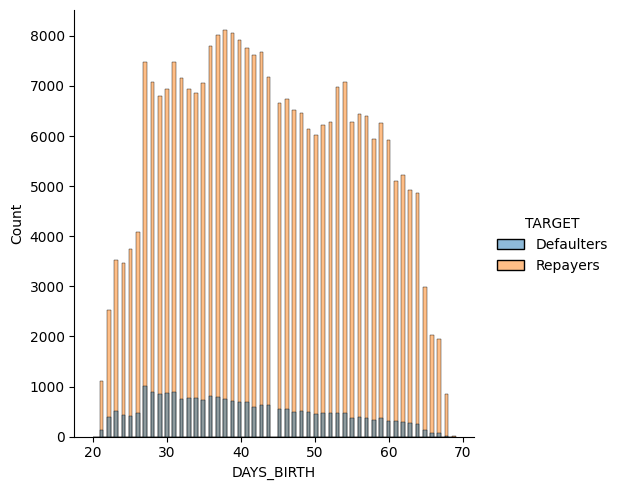

In [12]:
sns.displot(data=df,x = 'DAYS_BIRTH',bins = 100, hue='TARGET')

There are more defaulters between the age of 26 and 39.

### 1.4.Oganization Type with more defaulters

In [56]:
pd.set_option("display.max_rows", None) 

In [65]:
org_type = pd.DataFrame(df.groupby('ORGANIZATION_TYPE')['TARGET'].value_counts().reset_index())


In [79]:
d1 = pd.DataFrame(org_type.groupby('ORGANIZATION_TYPE')['count'].sum().to_frame('total').reset_index())

In [86]:
org_df = org_type.merge(d1,on='ORGANIZATION_TYPE')
org_df['percentage'] = (org_df['count']/org_df['total'])*100
org_df.sort_values(by='percentage',ascending=False)

,ORGANIZATION_TYPE,TARGET,count,total,percentage
98,Trade: type 4,Repayers,62,64,96.875000
34,Industry: type 12,Repayers,355,369,96.205962
106,Transport: type 1,Repayers,192,201,95.522388
102,Trade: type 6,Repayers,602,631,95.404120
84,Security Ministries,Repayers,1878,1974,95.136778
114,University,Repayers,1262,1327,95.101733
70,Police,Repayers,2224,2341,95.002136
62,Military,Repayers,2499,2634,94.874715
4,Bank,Repayers,2377,2507,94.814519
68,Pensioner,Repayers,52383,55373,94.600256


* According to the Percentage calculation, the following organization types, Trade: type 4,Industry: type 12,Transport: type 1,Trade: type 6,Security Ministries,University, Police have more than 95% of repayers. Hence it is safe to sanction the loans to customers from these organizations.
* The categories Transport: type 3, Industry type 13 ,Industry: type 8, Restaurants etc have more percentage of defaulters around 15%.

<Axes: xlabel='ORGANIZATION_TYPE', ylabel='count'>

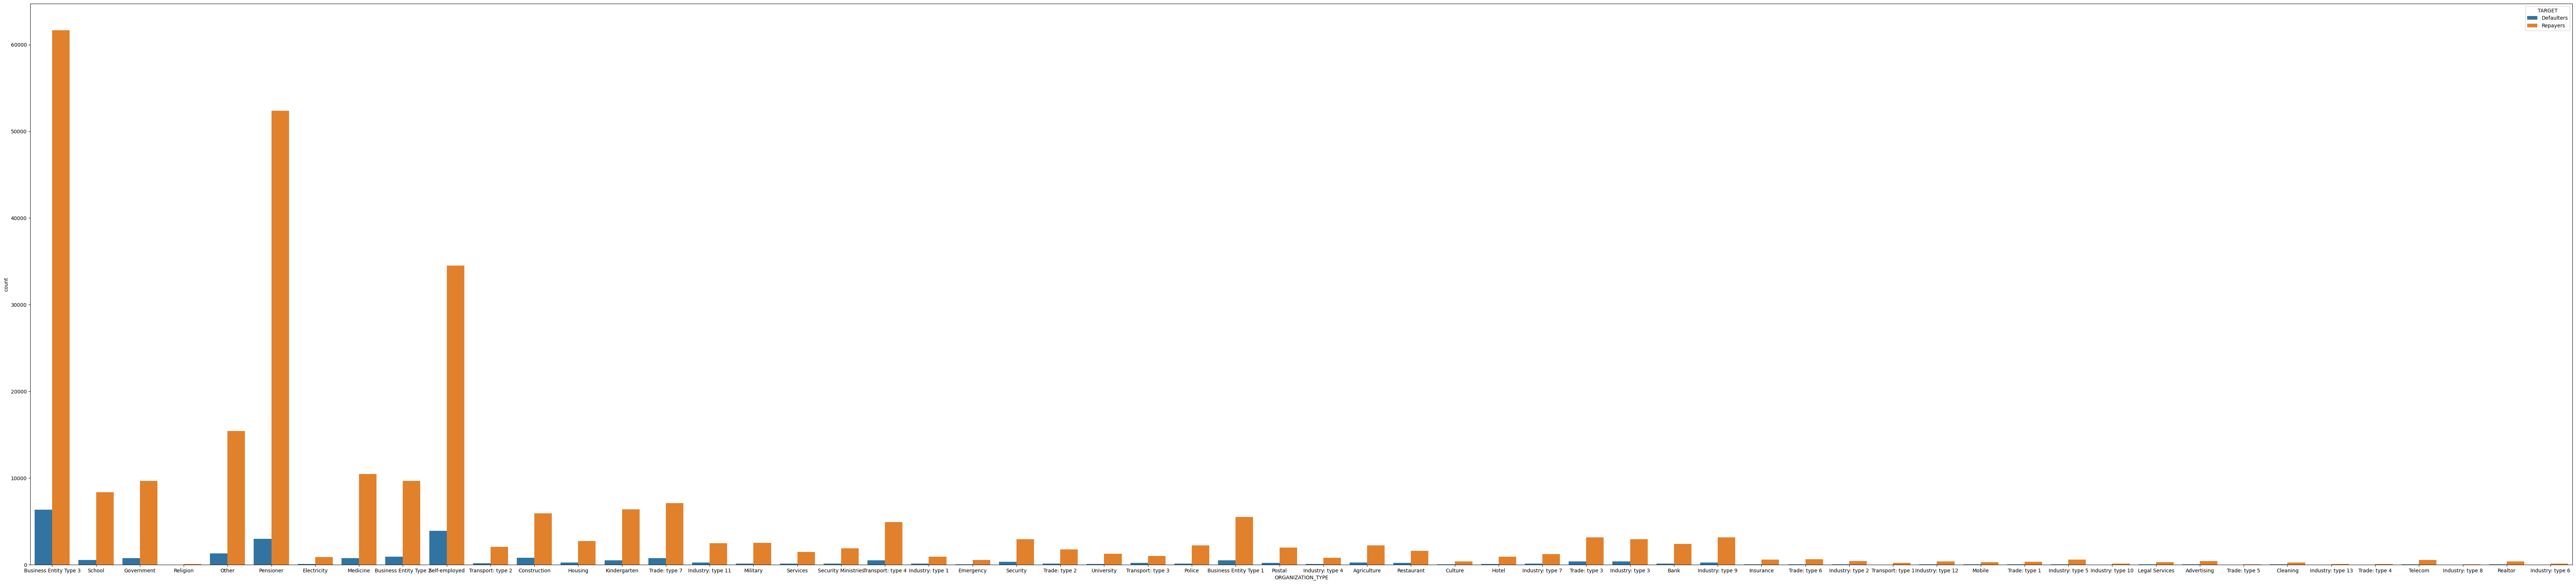

In [42]:
plt.figure(figsize=(90,20))
sns.countplot(data=df,x = 'ORGANIZATION_TYPE',hue='TARGET')

* The above plot shows the categories Business entity 3, Self employed, medicine and Pensioners take more loans than others.

# 2. Financial Analysis

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

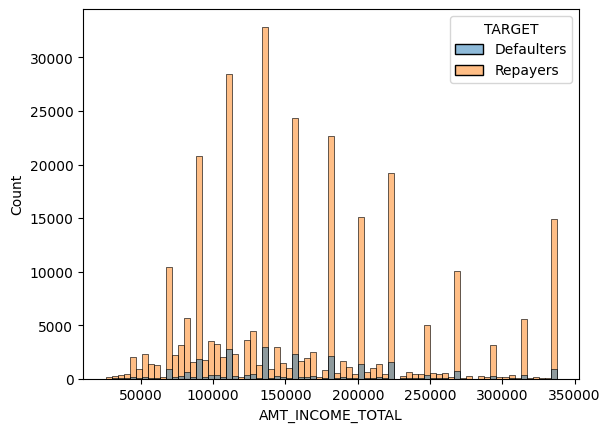

In [13]:
sns.histplot(data=df,x='AMT_INCOME_TOTAL',bins = 75,hue='TARGET')

There are defaulters in all ranges of income

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='DTI'>

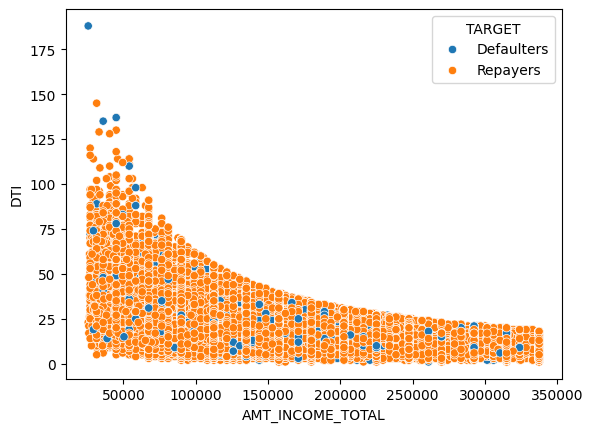

In [14]:
sns.scatterplot(data=df,x='AMT_INCOME_TOTAL',y='DTI',hue='TARGET')

* The plot clearly shows the people who have difficulty in paying back loans with respect to their income. 
* The pople who have their income lesser than 100000 have a higher DTI which makes them defaulter

# 3. Loan Application Decisions Analysis:

<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

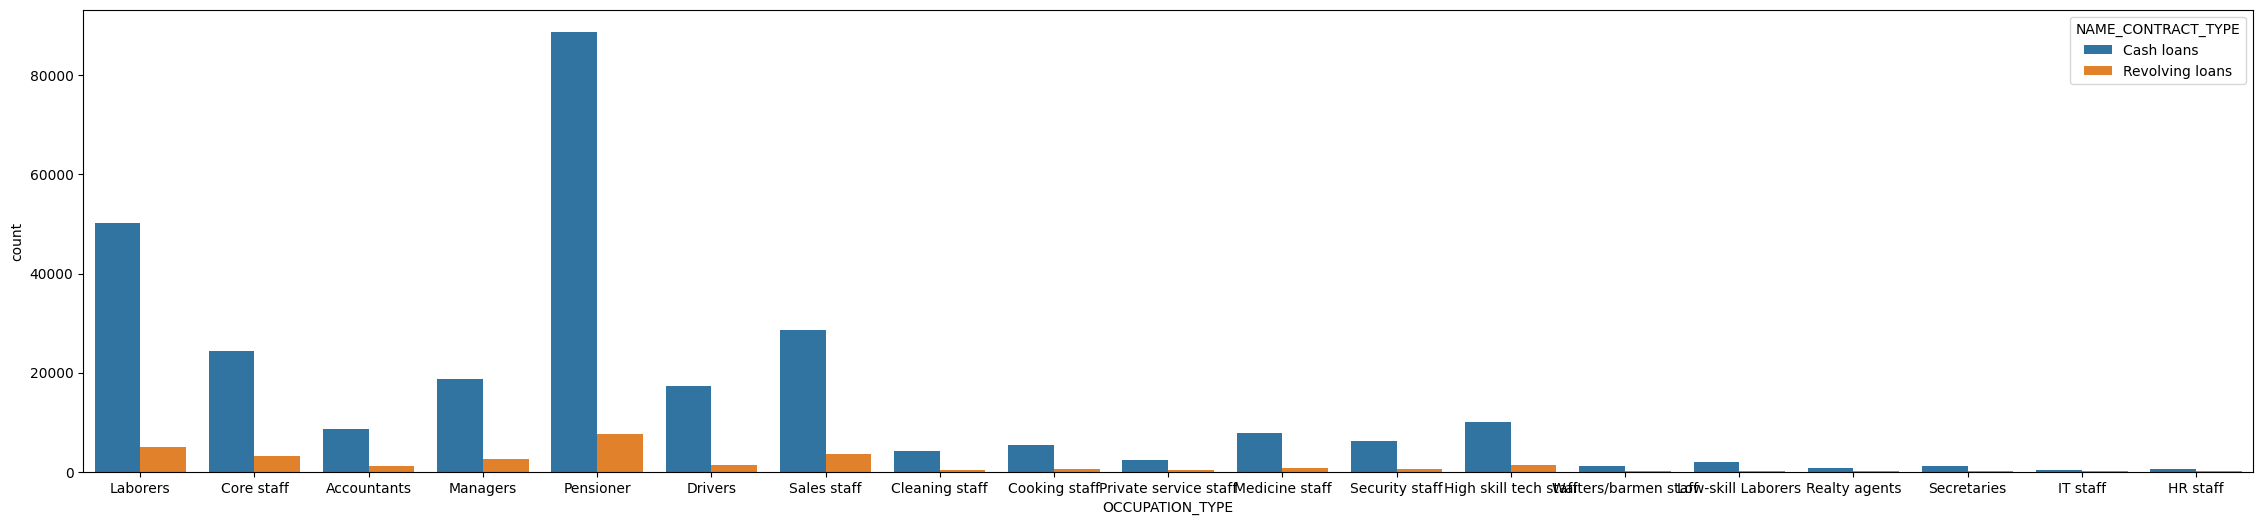

In [15]:
plt.figure(figsize=(28,6))
sns.countplot(data=df,x = 'OCCUPATION_TYPE',hue='NAME_CONTRACT_TYPE')

* Pensioners have taken more loans, followed by Labourers and Sales staff
* Cash loans are highly preferred over the revolving loans

<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

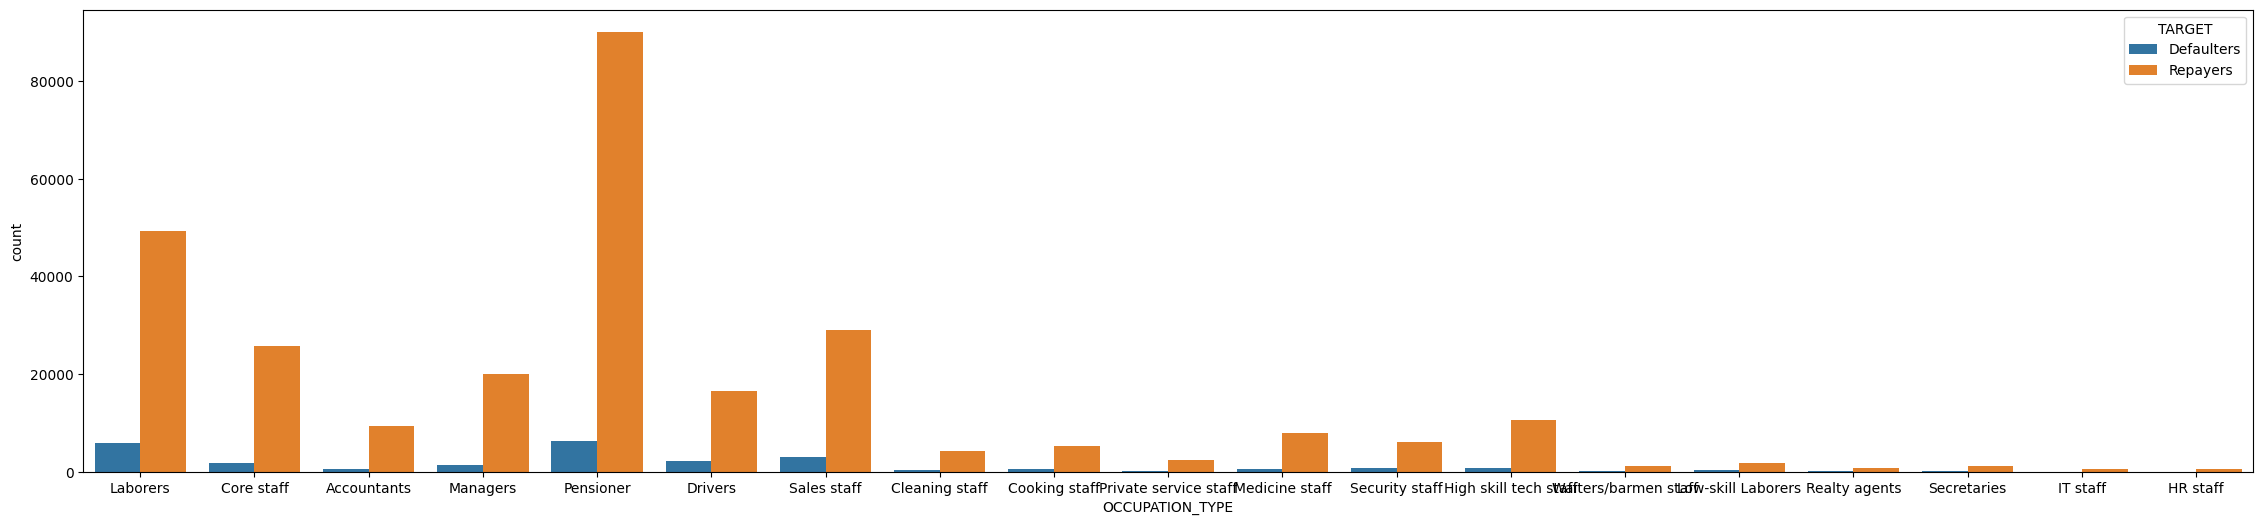

In [36]:
plt.figure(figsize=(28,6))
sns.countplot(data=df,x = 'OCCUPATION_TYPE',hue='TARGET')

# 4.Feature Importance Analysis:

In [16]:
num_cols = list(df.select_dtypes(include='number').columns)
num_cols.remove('SK_ID_CURR')

<Axes: >

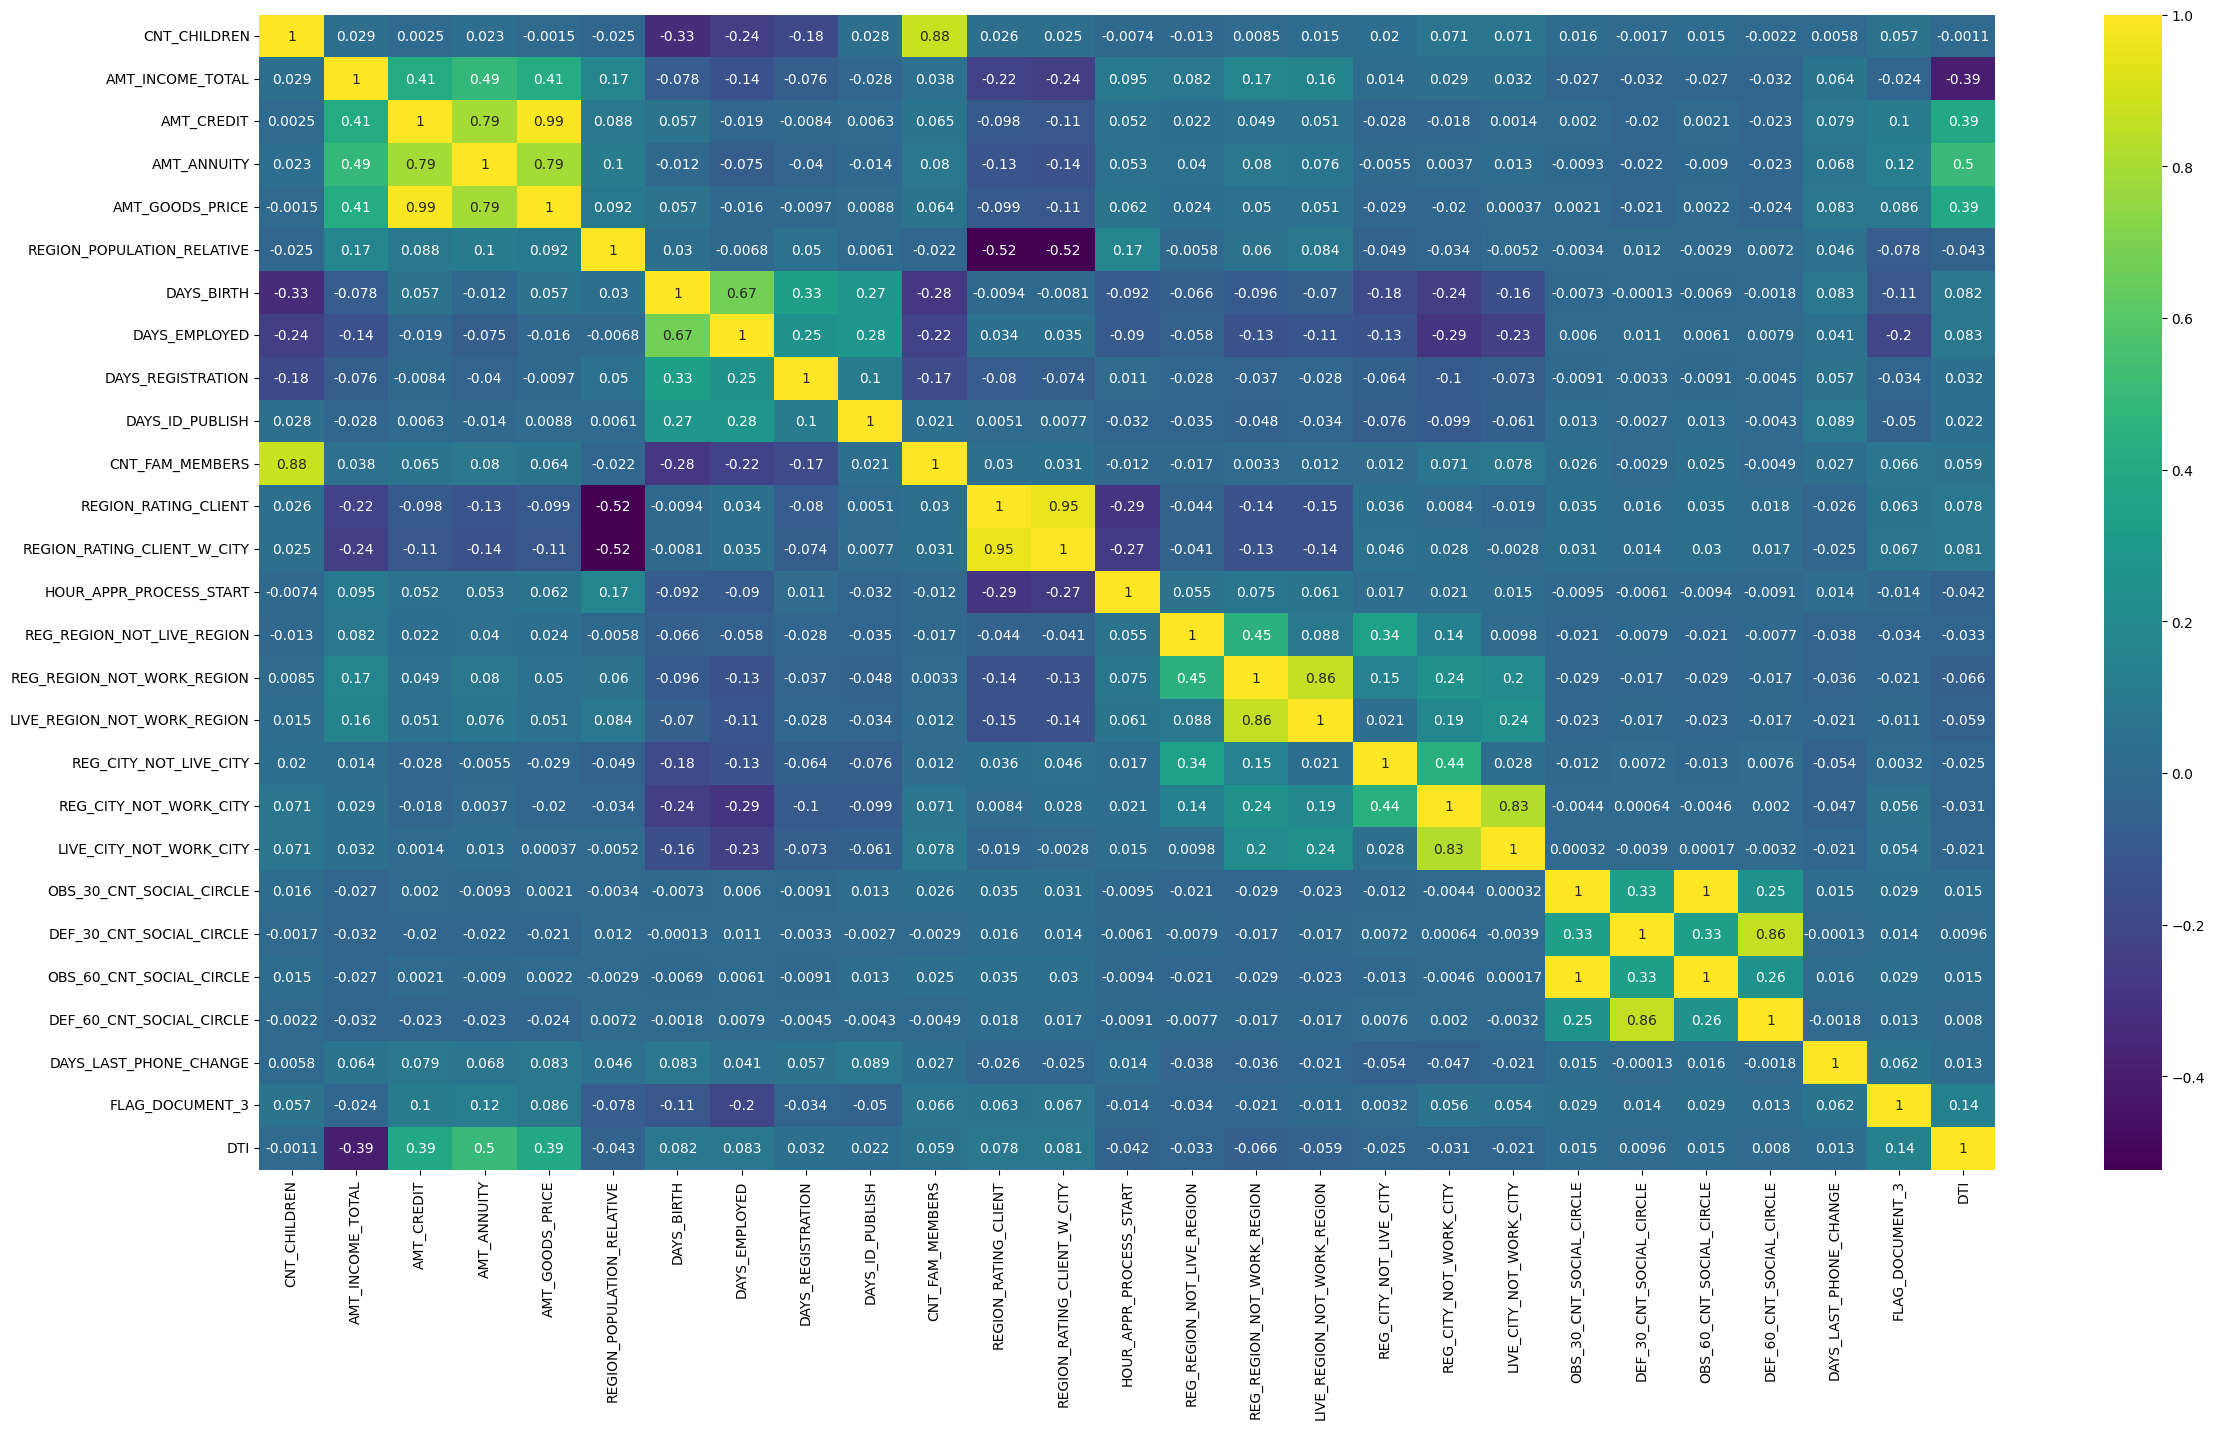

In [90]:
plt.figure(figsize=(28,15))
sns.heatmap(data = df[num_cols].corr(),annot=True,cmap= 'viridis')

* 1. Credit amount is highly correlated with: Goods Price Amount,Loan Annuity and Total Income
* 2. Debt to income ratio is negatively correlated with the income. More the income, less the DTI ratio.
The above heatmap does not show any lonear correlation between any columns and target column

### Education vs Income vs Loan

In [18]:
pd.DataFrame(df.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean())

,AMT_INCOME_TOTAL
NAME_EDUCATION_TYPE,
Academic degree,215429.268293
Higher education,193728.784582
Incomplete higher,174923.606354
Lower secondary,128406.127358
Secondary / secondary special,151945.873589


<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

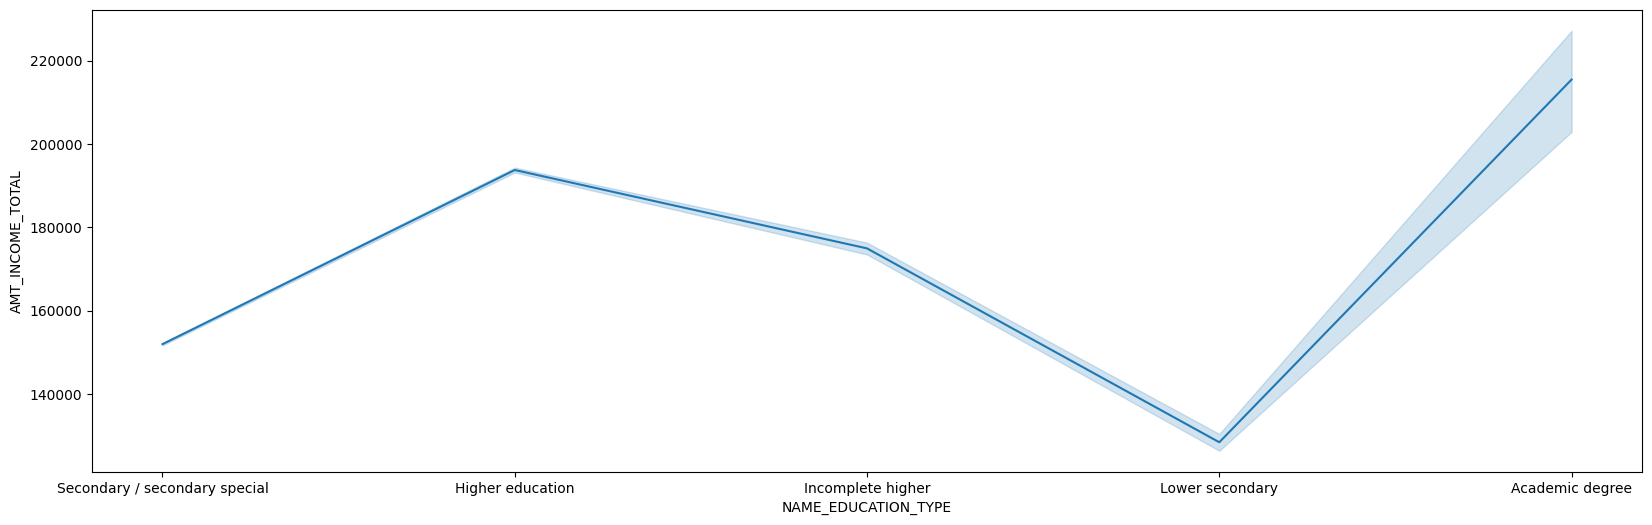

In [19]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df,x = 'NAME_EDUCATION_TYPE',y=df['AMT_INCOME_TOTAL'])

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

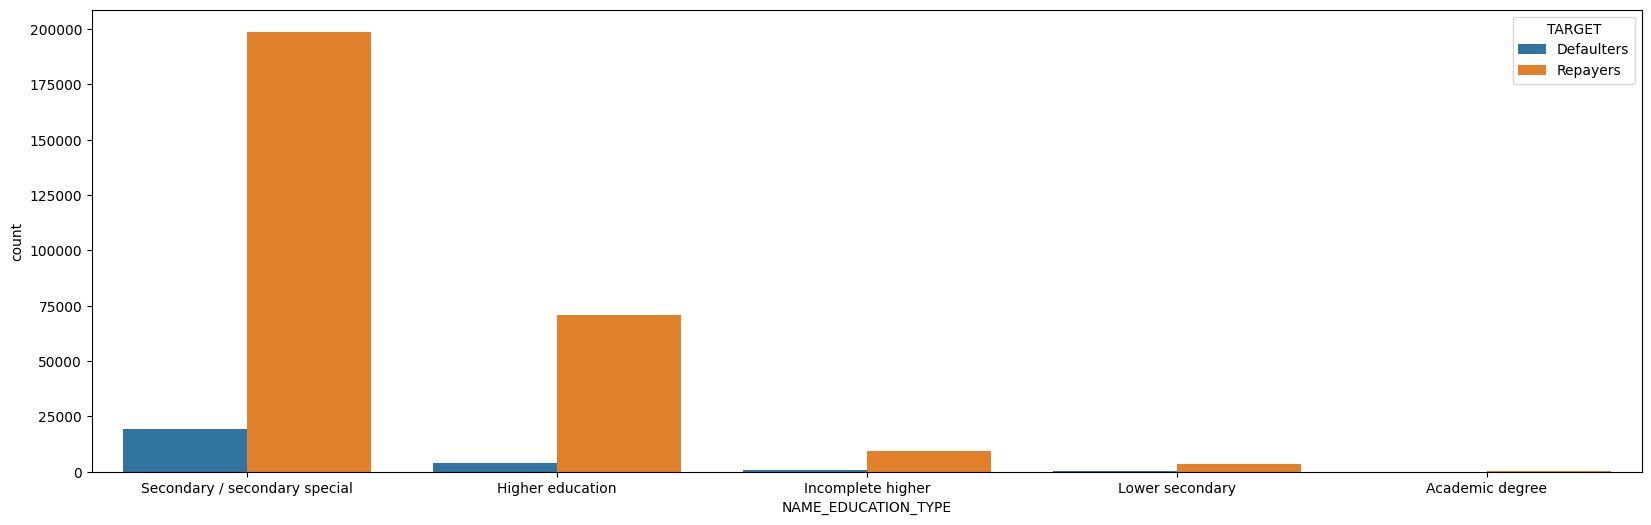

In [20]:
plt.figure(figsize=(20,6))
sns.countplot(data=df,x = 'NAME_EDUCATION_TYPE',hue='TARGET')

<Axes: xlabel='CODE_GENDER', ylabel='count'>

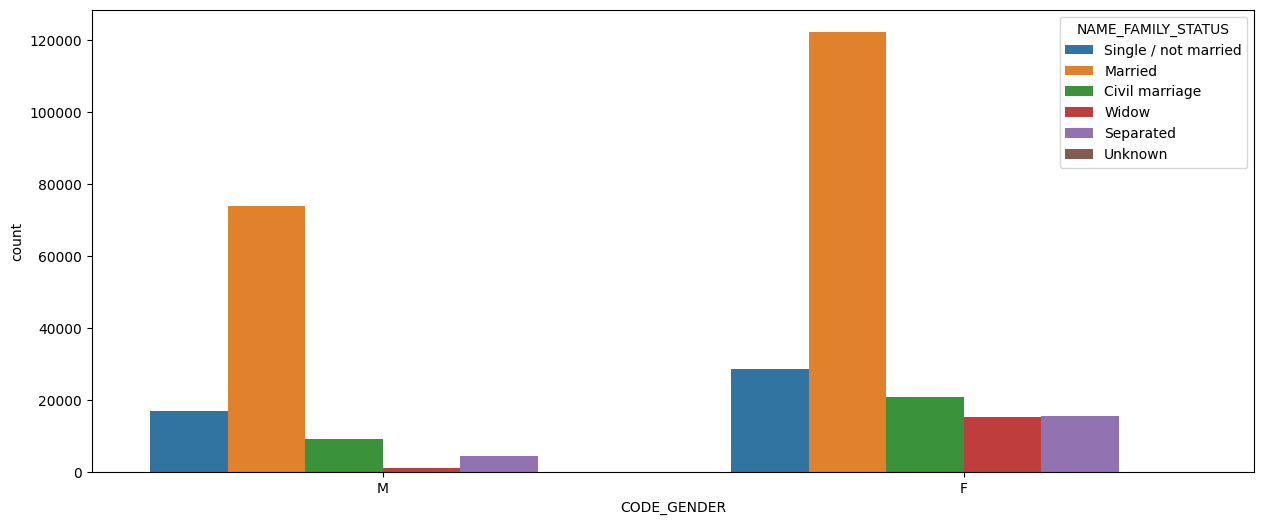

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x = 'CODE_GENDER',hue='NAME_FAMILY_STATUS')

* The above plots clearly shows the people with 'Secondary education' have an average of 150000, which is low compared to other education type.
* Also the 'secondary education' category are the people who take more number of loans followed by higher education.
* Secondary education category has large number of defaulters as well as repayers.
* The people with Academic degree have the highest average income compared to others and hence there has been no necessity to borrow loans.
* The plot also shows married people take more loans than other. Females take more loans in all the categories especially the female widows take less loan than male widows.

<Axes: xlabel='NAME_INCOME_TYPE', ylabel='count'>

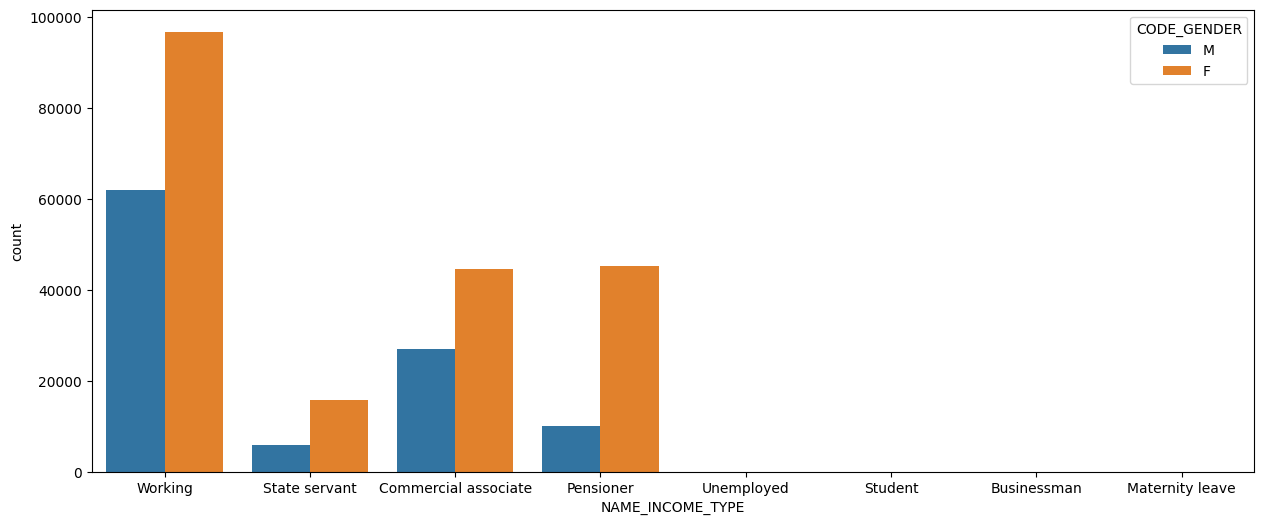

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x = 'NAME_INCOME_TYPE',hue='CODE_GENDER')

* Working people take more loans folowed by commercial associates and pensioners. In all the categories women tend to take more loans than men. Students, unemployed, Business men and women in maternity leave are less likely to take loans.

## Merging prev application and Application_data

In [95]:
df1 = pd.read_csv('prev_eda.csv')
df1.sample()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
375299,1561906,231303,Consumer loans,6048.495,41751.0,46314.0,41751.0,XAP,Approved,775,...,Connectivity,10.0,high,POS mobile with interest,365243,744,474,474,468,0


In [96]:
new_df = pd.merge(df, df1, how='inner', on='SK_ID_CURR')  #joins on values common to both the tables
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,Defaulters,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243,565,125,25,17,0
1,100003,Repayers,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243,716,386,536,527,1
2,100003,Repayers,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243,797,647,647,639,0
3,100003,Repayers,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243,2310,1980,1980,1976,1
4,100004,Repayers,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243,784,694,724,714,0


In [99]:
new_df.shape

(1413629, 69)

In [101]:
rep = new_df[new_df['TARGET']=='Repayers'] # Repayers
xrep = new_df[new_df['TARGET']=='Defaulters']

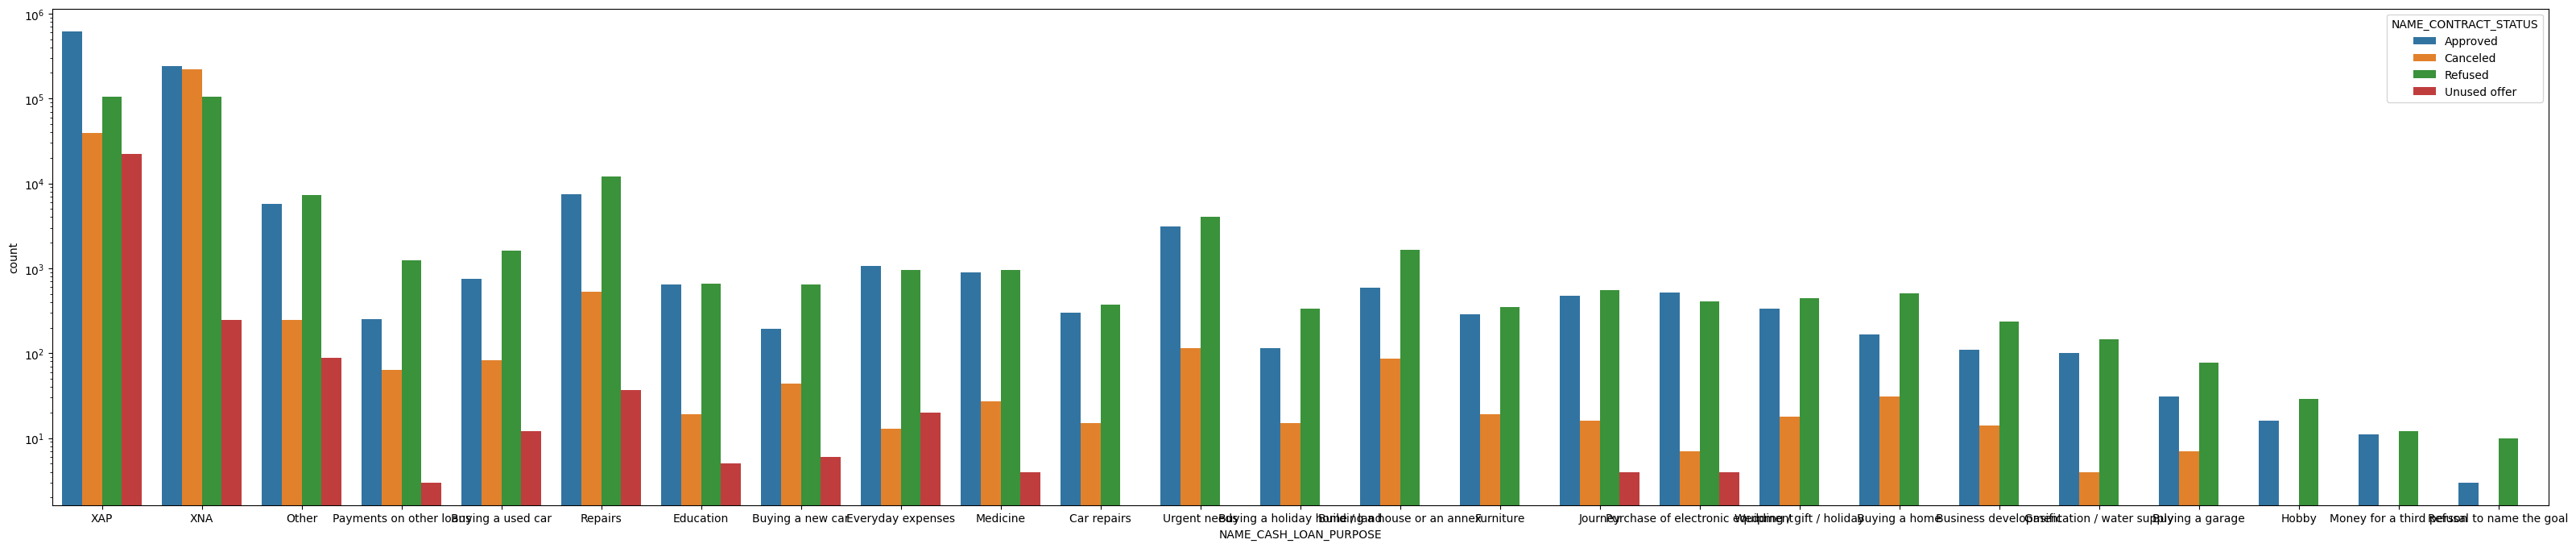

In [112]:
plt.figure(figsize=(40,8))
sns.countplot(data=new_df,x = "NAME_CASH_LOAN_PURPOSE",hue="NAME_CONTRACT_STATUS")
plt.yscale('log')

* Cash purpose column has many XNA,XNP values, which are unknown values. 
* The purposes like Urgent needs, Repairs, and other have taken more loans.
* More number of loans have been Approved, refused and cancelled in the same above said categories. But the count of approved loans are more in XNP,XNA categories as well.

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

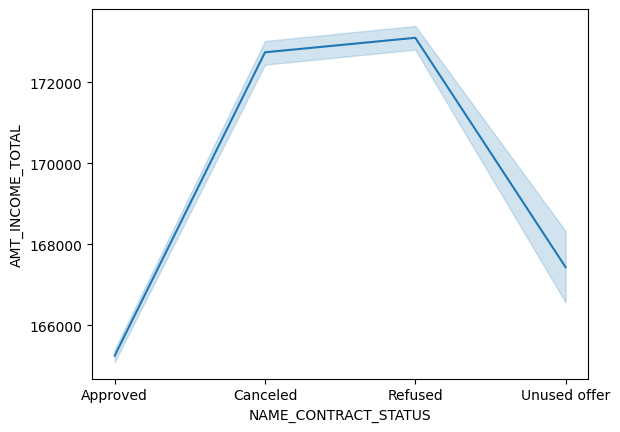

In [117]:
sns.lineplot(data=new_df,x="NAME_CONTRACT_STATUS",y= 'AMT_INCOME_TOTAL')

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

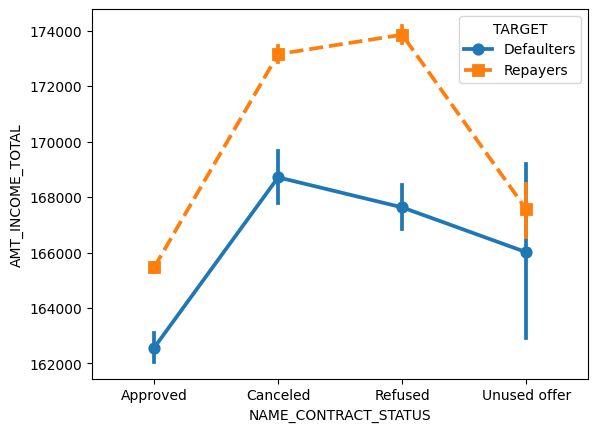

In [114]:
sns.pointplot(data= new_df,hue = "TARGET",x= "NAME_CONTRACT_STATUS",y= 'AMT_INCOME_TOTAL',markers=["o", "s"], linestyles=["-", "--"])

* The plot shows despite higher income, people have been refused loans, though previously they had been repayers.

# Conclusion


* From all the above analysis, it is clear that women tend to take more loans in all the categories like married, single, widow, separated etc.Obviously there are more defaulters and repayers in females. 
* Mostly less educated people with less income, especially the Pensioners take more loans and as their income is very less, their repaying capacity is less. 
* People with higher educational qualifications or income, for example, businessman, do not take any loans. 
* More defaulters are seen among the pensioners,labourers and drivers. IT people and Realtly agents are less like to apply the loans.
* 90% of the previously cancelled client have actually repayed the loan. The reason for cancellation has to considered which might help the bank to identify and negotiate the loans with these repaying customers in future for increase in business opportunities.
* More than 80% of the clients who were refused for loan earlier have turned into a repaying clients. Hence documenting the reason for rejection could help improve the business loss and these clients could be contacted for further loans.

In [ ]:
new_df.to_csv('loan_data.csv',index=False)